based on https://www.datacamp.com/tutorial/text-classification-python

# Prepare Data

In [1]:
import pandas as pd
import os
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
unmet_list = []
met_list = []
for file in os.listdir('./data/'):
    data = pd.read_csv('./data/'+ file)
    if file.endswith("_unmetNeeds.csv"):

        for i in range(len(data['Notes'])):
            unmet_list.append([data['Role'][i], data['Notes'][i]])

    elif file.endswith("_metNeeds.csv"):
        for i in range(len(data['Notes'])):
            met_list.append([data['Role'][i], data['Notes'][i]])
    
unmet_df = pd.DataFrame(unmet_list, columns=['Role', 'Notes'])
met_df = pd.DataFrame(met_list, columns=['Role', 'Notes'])     

                

In [3]:
def word_cleaner(dataframe):
    lemmatizer = WordNetLemmatizer()
    corpus = [] 
    for i in range(len(dataframe)):
        r = re.sub('^a-zA-Z', ' ', dataframe['Notes'][i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if word not in stopwords.words('english')]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        corpus.append(r)

    dataframe['Notes'] = corpus
    return dataframe

met_df = word_cleaner(met_df)
unmet_df = word_cleaner(unmet_df)

print(met_df)


      Role                                              Notes
0    Nurse  appeared comfortable morning. vital sign stabl...
1    Carer  participated group activity creating greeting ...
2    Nurse  reported experiencing occasional fatigue decre...
3    Carer  seemed withdrawn one-on-one activity time. off...
4    Nurse  expressed feeling anxiety upcoming medical pro...
..     ...                                                ...
195  Carer  participated minimally social activity today. ...
196  Nurse  appeared comfortable pain-free morning. vital ...
197  Carer  enjoyed looking gardening catalogue discussing...
198  Nurse  slept peacefully throughout night. vital sign ...
199  Carer  seemed content listening nature documentary ca...

[200 rows x 2 columns]


In [4]:
met_list = []
for _ in range(len(met_df)):
    met_list.append('met')
met_df['Needs'] = met_list
print(met_df)

      Role                                              Notes Needs
0    Nurse  appeared comfortable morning. vital sign stabl...   met
1    Carer  participated group activity creating greeting ...   met
2    Nurse  reported experiencing occasional fatigue decre...   met
3    Carer  seemed withdrawn one-on-one activity time. off...   met
4    Nurse  expressed feeling anxiety upcoming medical pro...   met
..     ...                                                ...   ...
195  Carer  participated minimally social activity today. ...   met
196  Nurse  appeared comfortable pain-free morning. vital ...   met
197  Carer  enjoyed looking gardening catalogue discussing...   met
198  Nurse  slept peacefully throughout night. vital sign ...   met
199  Carer  seemed content listening nature documentary ca...   met

[200 rows x 3 columns]


In [5]:
unmet_list = []
for _ in range(len(unmet_df)):
    unmet_list.append('unmet')
unmet_df['Needs'] = unmet_list
print(unmet_df)

      Role                                              Notes  Needs
0    Nurse  resident awake vital sign stable. offered brea...  unmet
1    Carer  assisted resident walking activity time. resid...  unmet
2    Nurse  resident slept night. appetite decreased ate 2...  unmet
3    Carer  resident declined participation group activiti...  unmet
4    Nurse  resident appeared withdrawn morning care. vita...  unmet
..     ...                                                ...    ...
195  Carer  seemed withdrawn today. offered familiar comfo...  unmet
196  Nurse  appeared le talkative morning. vital sign rema...  unmet
197  Carer  participated minimally social activities. offe...  unmet
198  Nurse  reported experiencing occasional difficulty co...  unmet
199  Carer  seemed withdrawn today. offered quiet companio...  unmet

[200 rows x 3 columns]


In [6]:
all_data_df = pd.concat([unmet_df, met_df], axis=0)

In [7]:
all_data_df = all_data_df.reset_index()

In [8]:
print(all_data_df.drop(['index', 'Role'], axis=1))

                                                 Notes  Needs
0    resident awake vital sign stable. offered brea...  unmet
1    assisted resident walking activity time. resid...  unmet
2    resident slept night. appetite decreased ate 2...  unmet
3    resident declined participation group activiti...  unmet
4    resident appeared withdrawn morning care. vita...  unmet
..                                                 ...    ...
395  participated minimally social activity today. ...    met
396  appeared comfortable pain-free morning. vital ...    met
397  enjoyed looking gardening catalogue discussing...    met
398  slept peacefully throughout night. vital sign ...    met
399  seemed content listening nature documentary ca...    met

[400 rows x 2 columns]


In [9]:
X = all_data_df['Notes']
y = all_data_df['Needs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training data:', X_train.shape)
print('Test data:', X_test.shape)

Training data: (268,)
Test data: (132,)


In [10]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(268, 978)

# Model Training and Evaluation

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# generate predictions
predictions = lr.predict(X_test_cv)

predictions


array(['met', 'unmet', 'met', 'unmet', 'unmet', 'met', 'met', 'met',
       'met', 'unmet', 'unmet', 'met', 'met', 'unmet', 'unmet', 'met',
       'unmet', 'unmet', 'unmet', 'unmet', 'unmet', 'met', 'unmet', 'met',
       'unmet', 'unmet', 'unmet', 'met', 'met', 'met', 'unmet', 'unmet',
       'met', 'unmet', 'met', 'met', 'met', 'met', 'unmet', 'met', 'met',
       'met', 'met', 'unmet', 'met', 'unmet', 'met', 'met', 'met', 'met',
       'unmet', 'unmet', 'met', 'met', 'met', 'unmet', 'unmet', 'met',
       'unmet', 'unmet', 'unmet', 'unmet', 'unmet', 'met', 'met', 'met',
       'unmet', 'met', 'unmet', 'unmet', 'unmet', 'met', 'met', 'unmet',
       'met', 'unmet', 'met', 'met', 'unmet', 'met', 'unmet', 'met',
       'unmet', 'met', 'unmet', 'met', 'met', 'met', 'unmet', 'unmet',
       'met', 'met', 'met', 'met', 'unmet', 'met', 'met', 'met', 'unmet',
       'unmet', 'unmet', 'met', 'unmet', 'unmet', 'unmet', 'met', 'met',
       'unmet', 'unmet', 'met', 'unmet', 'unmet', 'unmet', '

In [15]:
import pandas as pd
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['met', 'unmet'], columns=['met', 'unmet'])
df

,met,unmet
met,63,1
unmet,3,65


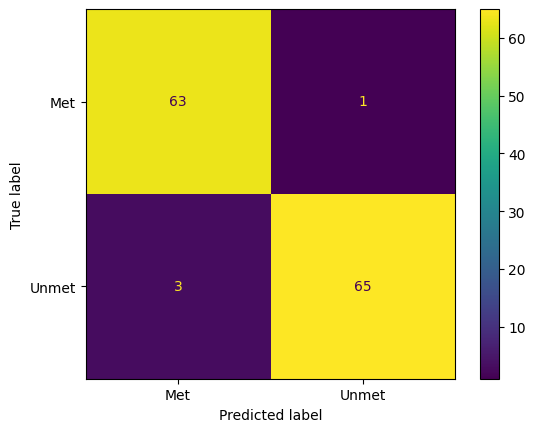

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Met', 'Unmet'])
cm_display.plot()
plt.show()

In [17]:
validation_df = pd.read_csv('./validation.csv')
validation_df = cv.transform(validation_df)
test_prediction = lr.predict(validation_df)
test_prediction

array(['unmet', 'unmet', 'unmet', 'unmet', 'unmet'], dtype=object)